In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
import librosa
import scipy.io.wavfile

In [15]:
x, sr = librosa.load("airplane_1s.wav", sr = 44100);
print (x.shape, sr)

(44100,) 44100


In [16]:
class Velvet():
    def __init__(self, pulse_density = 20.0, sr = 44100):
        self.pulse_density = pulse_density
        self.sr = sr
    def tick(self, buf_size:int):
        dice = np.random.rand()
        sign = 0
        if dice < self.pulse_density/self.sr:
            #sign = np.random.rand() - 0.5
            #if sign < 0:
            #    sign = -1
            #else:
            #    sign = 1
            sign = round(np.random.rand())*2 - 1
        tap = int(np.random.rand()*(buf_size - 1))
        return sign, tap

In [19]:
# Velvet noise generatore
v = Velvet(sr*0.10, sr)

# input length
in_len = x.shape[0]

# Output length and buffer
out_sec = 10.0;
out_len = np.floor(sr*out_sec).astype(np.int)
out_buf = np.zeros(out_len)

# Tap location and tap sign
sign_list = []
tap_list = []

for i in range(out_buf.shape[0]):
    # Get the velvet frame
    sign, tap = v.tick(in_len)
    
    # Add to tap and sign lists
    if sign != 0:
        sign_list.append(sign)
        tap_list.append(tap)
        
    # Tap and Sign, and assign to out_buf
    out_samp = 0.0
    if len(tap_list) > 0:
        out_samp = x[tap_list]*np.array(sign_list)
        out_samp = np.sum(out_samp)
    out_buf[i] = out_samp
    
    new_tap_list = []
    new_sign_list = []
    # Incerment tap
    # Filter invalid values
    for tap, sign in zip(tap_list, sign_list):
        tap += 1
        if tap < in_len:
            new_tap_list.append(tap)
            new_sign_list.append(sign)
    tap_list = new_tap_list
    sign_list = new_sign_list

1.0
1.0


Text(0.5, 1.0, 'Output')

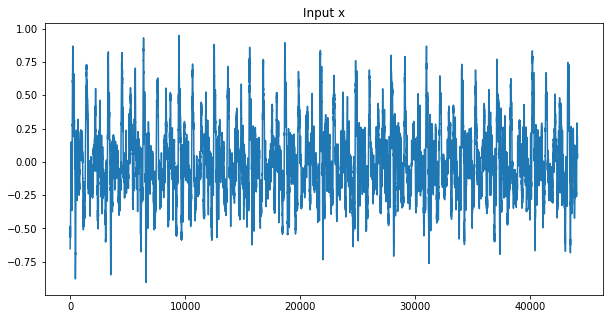

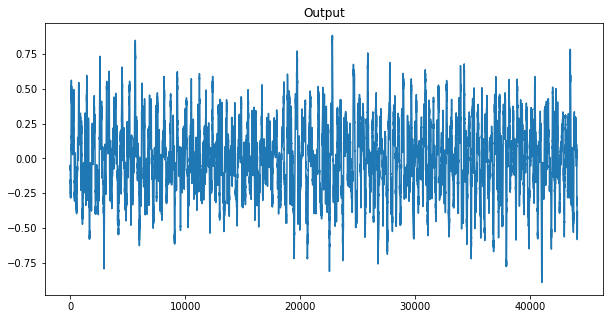

In [21]:
filename = "./audios/velvet_out.wav"

scipy.io.wavfile.write(filename, sr, out_buf/np.max(out_buf))

print (np.max(out_buf))
out_buf /= np.max(out_buf)
print (np.max(out_buf))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x)
ax.set_title("Input x")

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(out_buf[int(2*sr):int(3*sr)])
ax.set_title("Output")

In [ ]:
for i in range(sr):
    sign, tap = v.tick(sr)
    if sign != 0:
        signs.append(sign)
        y[tap] = sign 
        count += 1
    
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(y)
print (count)

In [58]:

a = np.arange(20)
print (a)
indices = [0, 1, 3, 5, 7]
print (type(a[indices])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
<class 'numpy.ndarray'>


10
8820.0
[0 1 2 3 4 5 6 7 8 9]
[0.52578083 0.6854187  0.52583018 0.90889545 0.29323489 0.22952496
 0.30328787 0.5418775  0.07004288 0.57950178]
[ 4637 14865 22277 34476 37866 46124 55595 66519 71178 84491]


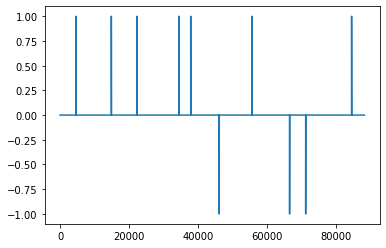

In [14]:
fs = 44100
Nd = 5 # Number of  impulses/sec
Td = fs/Nd

sec = 2


M = np.floor(fs/Td).astype(np.int)*sec
m = np.arange(M) # imfs/Pulse counter
r1 = np.random.uniform(size=M)
k = np.round(m*Td+r1*(Td-1)).astype(np.int)
print (M)
print (Td)
print (m)
print (r1)
print (k)

s = []
#for i in range(int(np.max(k))+2):
for i in range(fs*sec):
    if i in k:
        a = 2*np.round(np.random.uniform()).astype(np.int)-1
        s.append(a)
    else:
        s.append(0)
plt.plot(s)

In [34]:
fs/Td

20.0